In [ ]:
# 2.3 Gradient descent understanding.
# Tratemos de entender el proceso por el cual la red meuronal "aprende".

In [ ]:
# :)

# 2.3 Gradient descent understanding.
#### Example 1
 Tratemos de entender el proceso por el cual la red meuronal "aprende".

En el examplo0, sabíamos la función, y sabemos en consecuencia, la derivada de la función de costo o loss.

Supongamos que deseamos estimar el siguiente modelo:

$ y = \theta_0 + \theta_1 x$

basado en un conjunto de muestras de entrenamiento en el par $(x,y)$.

De acuerdo a GD, necesitamos estimar los parámetros $\theta_0$ y $\theta_1$ para minimizar el loss o cost.

Nuestra función de costo o pérdida podría ser:

$MSE = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2$

Pero $\hat{y}_i$ depende de los parámetros $\theta_0$ y $\theta_1$, por lo que se puede re-escribir como:

$ MSE =  \frac{1}{n} \sum_{i=1}^{n} (\hat{\theta}_0 + \hat{\theta}_1 x - y_i)^2 $

Así, por ejemplo, el gradiente del MSE, respecto a $\theta_1$ sería:


$ \frac{2}{n} \sum_{i=1}^{n} (\hat{\theta}_0 + \hat{\theta}_1 x - y_i)x$

Entonces, de acuardo a GD, nuestro algoritmo aproxima los parámetros de acuerdo a:

$\theta_j := \theta_j - \eta \frac{1}{n}\sum_{i=1}^{n} (h_{\theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)}$


Veamos una alternativa de implementar esto en python, para el modelo lineal.


In [6]:
# Para el ejemplo, veamos un set de datos real, como por ejemplo del de los precios de
# departamentos (Boston dataset)

import numpy as np
import pandas as pd
#import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


# Carga de Boston data set:
# https://www.kaggle.com/competitions/boston-housing/data?select=train.csv

url = 'https://raw.githubusercontent.com/MAValle/deepLearning_intro_course/main/boston_train.csv'
data = pd.read_csv(url)

data = data.drop(['ID'], axis=1)
data.rename(columns = {'medv':'target'}, inplace = True) # vD: valor US$X1000

data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [10]:
# Generamos una matriz de features o prodictores (X) y el vector de targets (y).
# También vamos a inicializar el vector de parametros Theta1 y theta2.

X,y = data.drop('target',axis=1), data['target']
#y
thetas = np.zeros(X.shape[1]) # como son 13 predictores, tendremos 13 thetas
thetas

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
# no olvidemos escalar los predictores:
X_norm = (X - X.min()) / (X.max() - X.min())
X = X_norm

In [16]:
# Definimos nuestra funcion de loss:
# compare esto con lo que teníamos arriba en la explicacion.

def loss_function(X,Y, B):
    predictions = np.dot(X,B.T) # aqui calculamos la prediccion de y (en forma matricial)
    loss = (1/len(Y)) * np.sum((predictions - Y) ** 2)
    return loss

# probando probando
# loss_function(X,y,thetas)

In [31]:
# Ahora al GD!!
# Implementamos una funcion que haga GD para este caso:
# Inputs:
# X, Y ... datos de train
# theta : vector de los parametros del modelo
# eta: learning rate
# iters:  numero de iteraciones de gd

def gd(X, Y, thetas, eta, iters):
    loss_history = [0] * iters  # inicializar el vector de loss para ir registrando valor de loss
    for i in range(iters):
        prediction = np.dot(X,thetas.T)
        thetas = thetas - (eta/len(Y)) * np.dot(prediction - Y, X)   # note que es nuestro gradiente
        loss_history[i] = loss_function(X, Y, thetas)
    return thetas, loss_history

# probando probando
batch_thetas, batch_history = gd(X, y, thetas, 0.05, 500)
print(batch_thetas)
print(loss_function(X, y, batch_thetas) )
print(len(batch_history))

[-1.24883117  5.41949228 -0.75243053  4.8530056   1.00782252 19.81771606
  3.69395449  3.37832578  1.51646474 -1.66471734 -1.95666481 13.51866563
 -9.65726743]
35.7955443267188
500


Text(0, 0.5, 'Loss')

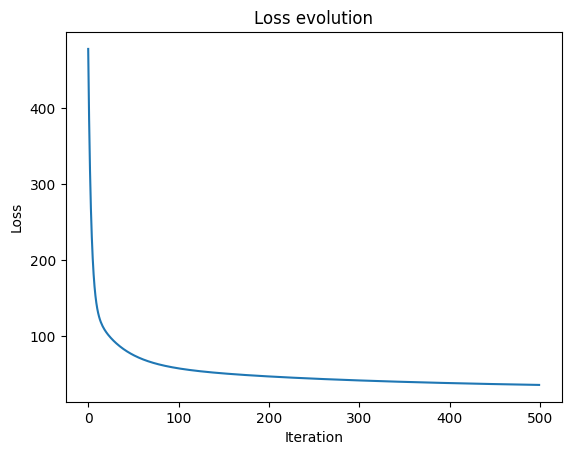

In [38]:
# grafiquemos la evolucion de loss, que es nuestro indicador de como va la cosa:
import matplotlib.pyplot as plt
plt.plot(batch_history)
plt.title("Loss evolution")
plt.xlabel("Iteration")
plt.ylabel("Loss")
#type(batch_history)




### Conclusión
Consideremos algunas observaciones:

1. En el ejemplo anterior, tomábamos el set completo de X (toda la base de datos) para hacer un upgrade de los parámetros. A veces esto no es posible, y debemos tomar un "batch", es decir, una muestra más pequeña para hacer el upgrade. Los batches van cambiando en cada iteración. este método se denomian stochastic gradient descent.

2. La tasa de aprendizaje siempre está fija. No obstante, conforme converge la función de loss, es deseable que esta tasa vaya disminutyendo para hacer ajustes cada vez más precisos. Esto se denomina "Learning Schedule". Ojo que la Tasa no debe ser ni muy grande (o de otra forma tendremos sobre ajustes), ni muy chica (o el aprendizaje es muy lento).
